In [1]:
from datetime import datetime, timedelta
import datetime as dt

import pandas as pd
import numpy as np

import torch

import matplotlib.pyplot as plt
%matplotlib inline

import orbit
from orbit.models import ARMA
from orbit.utils.simulation import make_trend, make_regression
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components

<class 'numpy.ndarray'>


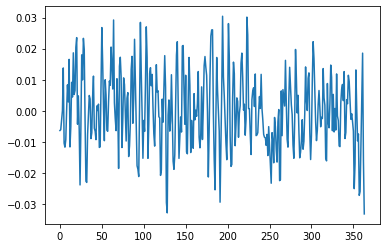

In [2]:
# make the data
n = 365 # hourly for 1 year 

x0 = np.random.normal(0, 1, n)
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
x4 = np.random.normal(0, 1, n)
x5 = np.random.normal(0, 1, n)
x6 = np.random.normal(0, 1, n)
x7 = np.random.normal(0, 1, n)
x8 = np.random.normal(0, 1, n)
x9 = np.random.normal(0, 1, n)

X = np.vstack([x0, x1]).transpose()
   
eta = np.random.normal(0, 0.01, n)

rho = [0.45, -0.25,0.25]
beta = [0.00, -0.00]
y = eta.copy()
for i in range(2, n):
    y[i] = rho[0]*y[i-1] + rho[1]*y[i-2] + rho[2]*y[i-7] + x0[i]*beta[0]+ x1[i]*beta[1]+ eta[i]

     
#plt.plot(y)
plt.plot(y[1:500])
print(type(X))

#making the date stuff 
def daterange(start_date, end_date):
    delta = timedelta(hours=1)
    while start_date < end_date:
        yield start_date
        start_date += delta
        
hours = [datetime(2013, 1, 1, 14, 00)]        

start_date = datetime(2021, 1, 1, 00, 00)
end_date = datetime(2022, 1, 1, 00, 00)
i = 0
for single_date in daterange(start_date, end_date):
    hours[i]=hours.append(single_date.strftime("%Y-%m-%d %H:%M"))       
    i += i
hours = hours[1:(n+1)]
hours = [dt.datetime.strptime(hour, "%Y-%m-%d %H:%M") for hour in hours]

df = pd.DataFrame(X, columns=['a1', 'a2'])
df['hours'] = hours
df['y'] = y

df_train = df.iloc[0:330,:]
df_test = df.iloc[330:n,:]

In [3]:
mod = ARMA(
        regressor_col=['a1', 'a2'],
        lm_first=0,
        estimator='stan-mcmc',
        date_col = 'hours',
        response_col = 'y',
        num_of_ar_lags = 2,
        ar_lags = [1,7],
        num_of_ma_lags = 1,
        ma_lags = [1] ,
)

mod.fit(df_train)

INFO:orbit:Sampling(PyStan) with chains:4, cores:8, temperature:1.0, warmups(per chain):225 and samples(per chain):25.


In [4]:
predicted_df = mod.predict(df)

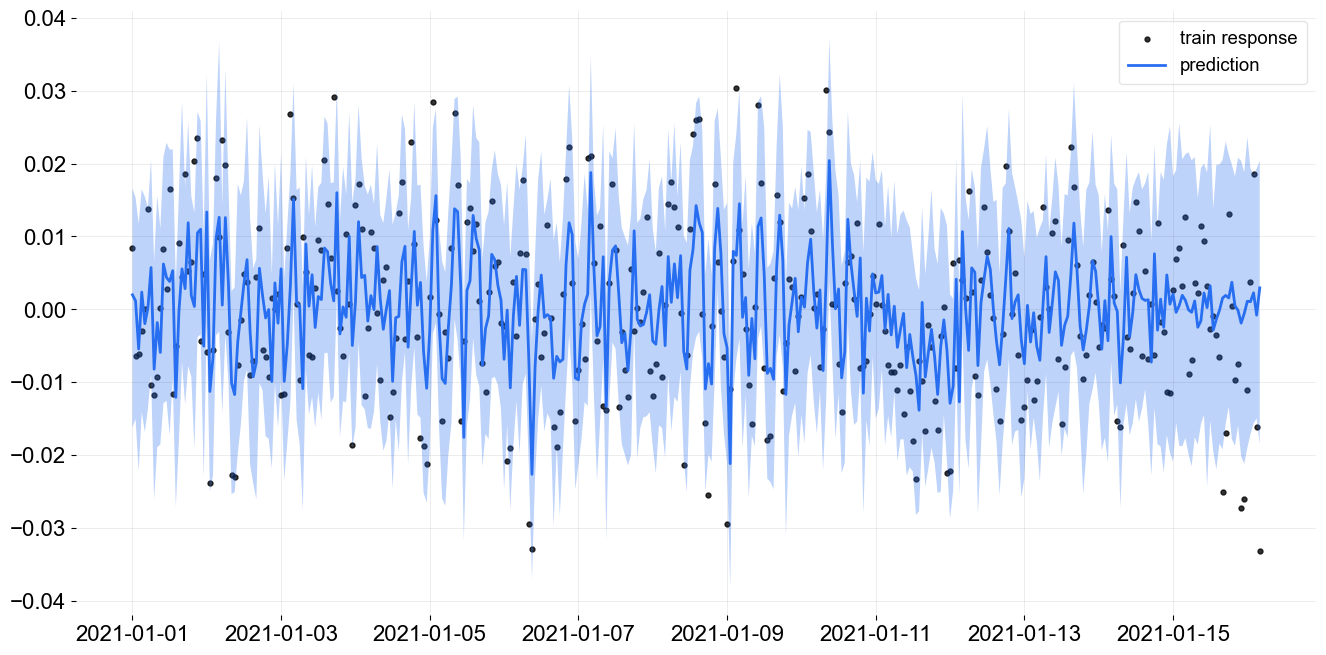

<AxesSubplot:>

In [5]:
plot_predicted_data(training_actual_df=df, predicted_df=predicted_df, date_col='hours', actual_col='y')

In [7]:
1777668/734

2421.891008174387